In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset,Dataset
import numpy as np
import pandas as pd

In [36]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device=0

print(device)
print(torch.cuda.get_device_name(0))

0
NVIDIA GeForce RTX 4060 Laptop GPU


In [37]:
print(torch.__version__)

2.5.1+cu121


In [38]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Transform (resize + convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize all images to same size
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# Load dataset
Full_dataset=datasets.ImageFolder(root="D:/Project-to-learn/Agriculture_Potato_Disease_Classification/Data/PlantVillage", transform=transform)


# Class names
classes = Full_dataset.classes
print("Classes:", classes)

Classes: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']


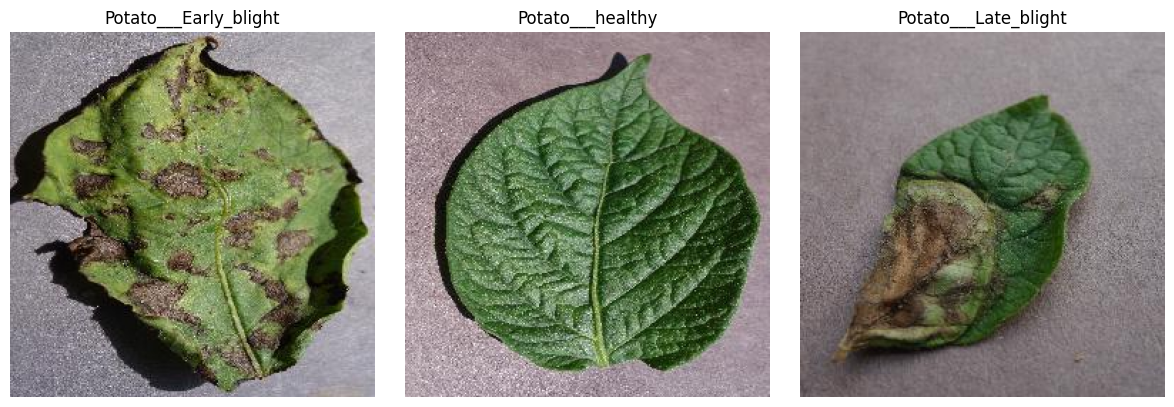

In [45]:
import os
from PIL import Image
import matplotlib.pyplot as plt
base_path='D:/Project-to-learn/Agriculture_Potato_Disease_Classification/Data/PlantVillage'
folders=os.listdir(base_path)
print(folders)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, folder in enumerate(folders):
    folder_path = os.path.join(base_path, folder)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_path = os.path.join(folder_path, image_files[0])  # Take the first image from each folder
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(folder)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

3. Split into Training and Validation Sets --

In [46]:
#Spliting The data format
from torch.utils.data import random_split
train_size = int(0.8 * len(Full_dataset))
val_size = len(Full_dataset) - train_size
train_dataset, val_dataset = random_split(Full_dataset, [train_size, val_size])
print(f"Training images: {len(train_dataset)}")
print(f"Validation images: {len(val_dataset)}")

Training images: 1721
Validation images: 431


4. Create dataloader class

In [47]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=True)
print("\nDataLoaders created successfully!")


DataLoaders created successfully!


In [48]:
# --- 5. Inspect a Batch (Optional) ---
# Let's see what the DataLoader gives us.
# next(iter(...)) gets one batch.
images, labels = next(iter(train_loader))

print(f"\n--- Inspecting one batch ---")
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Example labels: {labels}")


--- Inspecting one batch ---
Images batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])
Example labels: tensor([0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1])


In [49]:
class Custom_Dataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


